In [64]:
from main import path_loss_coefficient
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import random
import numpy as np
from itertools import combinations
from sklearn.cluster import KMeans

def generate_error_distances(path_loss_coefficient, original_signal_strength):
    c = 3.0*(10**8)
    f = 2.4 * (10**9) 
    d0 = 1
    L_d0 = -30

    # 10 ** ((RSSI - 20 * math.log10(f) - 20 * math.log10((4 * math.pi) / c)) / 20)
    # d0 * 10 ** ((v - L_d0) / (10 * path_loss_coefficient))
    # d0 * 10 ** ((v - L_d0 - random.gauss(0, 10)) / (10 * path_loss_coefficient))
    # 10 ** ((RSSI - 20 * math.log10(f) - 20 * math.log10(4 * math.pi / c) - 20 * math.log10(d0)) / (10 * path_loss_coefficient))
    error_distances = {k: d0 * 10 ** ((v - L_d0) / (10 * path_loss_coefficient)) for k , v in
                       original_signal_strength.items()}
    return error_distances

# anchors = {
#         0: np.array([1.955, 0, 2.120]),
#         1: np.array([1.986, 3.327, 1.943]),
#         2: np.array([3.733, 1.244, 2.070]),
#         3: np.array([0, 1.930, 2.108]),
# }
anchors ={
        0: np.array([4.392, 2.209, 2.133]),
        1: np.array([6.883, 1.676, 2.209]),
        2: np.array([2.717, 0, 2.057]),
        3: np.array([0, 2.946, 1.651]),
        4: np.array([2.349, 2.400, 1.727]),
        5: np.array([5.626, 3.860, 1.676]),
}

all_combinations = list(combinations(anchors, 4))

# original_signal_strength = {
#         0: -52, 
#         1: -48,
#         2: -47,
#         3: -51
# }
original_signal_strength = {
        0: -38, 
        1: -55,
        2: -55,
        3: -63,
        4: -47,
        5: -43
}

path_loss_coefficient = 7.164194723072568
error_distances = generate_error_distances(path_loss_coefficient, original_signal_strength)
# error_distances ={
#     0:2.249,
#     1:1.470,
#     2:2.239,
#     3:2.0366
# }
all_possible_coordinates = []

for com in all_combinations:
    A = np.array([[2 * (anchors[com[0]][0] - anchors[com[1]][0]),
                   2 * (anchors[com[0]][1] - anchors[com[1]][1]),
                   2 * (anchors[com[0]][2] - anchors[com[1]][2])],
                  [2 * (anchors[com[0]][0] - anchors[com[2]][0]),
                   2 * (anchors[com[0]][1] - anchors[com[2]][1]),
                   2 * (anchors[com[0]][2] - anchors[com[2]][2])],
                  [2 * (anchors[com[0]][0] - anchors[com[3]][0]),
                   2 * (anchors[com[0]][1] - anchors[com[3]][1]),
                   2 * (anchors[com[0]][2] - anchors[com[3]][2])]])

    B = np.array([[(error_distances[com[1]]) ** 2 - (error_distances[com[0]]) ** 2 + (
    anchors[com[0]][0]) ** 2 - (anchors[com[1]][0]) ** 2 + (anchors[com[0]][1]) ** 2 - (
                   anchors[com[1]][1]) ** 2 + (anchors[com[0]][2]) ** 2 - (anchors[com[1]][2]) ** 2],
                  [(error_distances[com[2]]) ** 2 - (error_distances[com[0]]) ** 2 + (
                  anchors[com[0]][0]) ** 2 - (anchors[com[2]][0]) ** 2 + (anchors[com[0]][1]) ** 2 - (
                   anchors[com[2]][1]) ** 2 + (anchors[com[0]][2]) ** 2 - (anchors[com[2]][2]) ** 2],
                  [(error_distances[com[3]]) ** 2 - (error_distances[com[0]]) ** 2 + (
                  anchors[com[0]][0]) ** 2 - (anchors[com[3]][0]) ** 2 + (anchors[com[0]][1]) ** 2 - (
                   anchors[com[3]][1]) ** 2 + (anchors[com[0]][2]) ** 2 - (anchors[com[3]][2]) ** 2]    
                  ])

    X = np.dot(np.linalg.inv(A), B)

    temp_list = []
    for i in X.tolist():
        temp_list.extend(i)
    all_possible_coordinates.append(temp_list)

kmeans = KMeans(n_clusters=10)
kmeans.fit(all_possible_coordinates)

/home/oc/PycharmProjects/triangulization/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [65]:
error_distances

{0: 0.7732743004708095,
 1: 0.44775704466222094,
 2: 0.44775704466222094,
 3: 0.3462390154920559,
 4: 0.5790403798362409,
 5: 0.6584792018420589}

In [66]:
all_possible_coordinates

[[6.7373781519593345, 0.17520999244159186, -43.65832452891246],
 [5.678313383589821, -0.13996026685436994, -11.156422031495197],
 [5.584882792592438, -0.16776455651660982, -8.289107350120103],
 [62.73200556357311, 241.79548070388947, -184.43480601744068],
 [4.828053925548365, -8.063641800787062, -38.858079236822284],
 [5.5253922076745186, -0.7884205279733415, -10.691983478487225],
 [0.7026850162763459, 2.7250892803717846, 15.228881460971861],
 [3.1039289321475847, 1.7104756142445015, -8.202723415464419],
 [5.134651154200343, 0.17308948468832958, -8.273430806895794],
 [2.0255739036250775, 7.823703311894747, 10.970687577147789],
 [0.6899019718835743, 7.027574116572999, 46.53393530103084],
 [2.433368562268851, 5.052061099268624, 20.53181688956413],
 [4.84646547126488, 1.0552696412842477, -1.5362044215914032],
 [1.5076808383525764, 10.122057079236313, 43.489529252063555],
 [0.6696583815597673, 13.841110682846846, 96.10950318071691]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


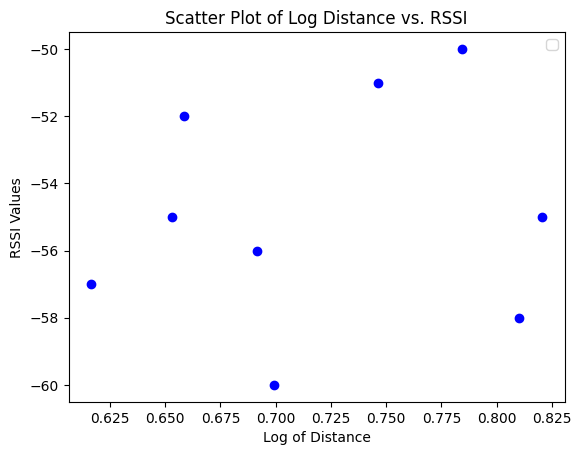

In [67]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

def euclidean_distance(wifi_location, points):
    original_distances = [np.linalg.norm(v[0] - wifi_location) for k , v in points.items()]

    return original_distances

rssi_values = np.array([-51, -55, -57, -56,-55, -58, -60, -52, -50])
points = {
        0: np.array([5.803, 0.711, 1.219]),
        1: np.array([2.463, 2.209, 1.219]),
        2: np.array([3.111, 3.162, 1.219]),
        3: np.array([1.981, 0.863, 1.219]),
        4: np.array([0.571, 3.81, 1.219]),
        5: np.array([0.685, 1.473, 1.219]),
        6: np.array([1.892, 2.006, 1.219]),
        7: np.array([2.387, 3.784, 1.219]), 
        8: np.array([6.210, 2.997, 1.219]),
}
wifi_loca = np.array([6.883, 1.676, 2.209])
distances = euclidean_distance(wifi_loca,points)
log_distance = [np.log10(i) for i in distances]
# log_distance = np.log10(np.array(log_distance))
x = np.array(log_distance).reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x,rssi_values)
plt.scatter(log_distance,rssi_values, color='blue')
plt.xlabel('Log of Distance')
plt.ylabel('RSSI Values')
plt.title('Scatter Plot of Log Distance vs. RSSI')
plt.legend()

# Show the plot
plt.show()
correlation_coefficient, _ = pearsonr(log_distance,rssi_values)

In [68]:
regressor.coef_[0]

7.164194723072568

In [69]:
labels = kmeans.labels_

In [70]:
list(labels)

[6, 0, 0, 1, 5, 0, 3, 0, 0, 8, 2, 9, 7, 2, 4]

In [71]:
kmeans.cluster_centers_[max(list(labels))]

array([ 2.43336856,  5.0520611 , 20.53181689])

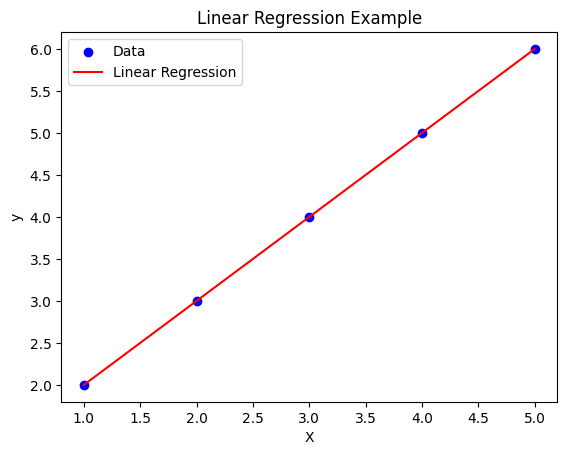

Slope (Coefficient): 1.0
Intercept: 1.0


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Input features (independent variable)
y = np.array([2, 3, 4, 5, 6])  # Target variable (dependent variable)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the data and regression line
plt.scatter(X, y, label='Data', color='blue')
plt.plot(X, predictions, label='Linear Regression', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

# Print the slope (coefficients) and intercept of the regression line
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)
